In [1]:
import sys
sys.path[0] = '/tensorflow-2.1.0/python3.6'
from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [0]:
import tensorflow as tf
import matplotlib.image as mpimg
from tensorflow import keras
from tensorflow.keras import layers, Sequential, losses, optimizers, datasets
from tensorflow.keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'2.1.0'

In [4]:
(x, y), (x_test, y_test) = datasets.mnist.load_data()
print(x.shape,y.shape,x_test.shape,y_test.shape)
print(x.dtype,y.dtype)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
uint8 uint8


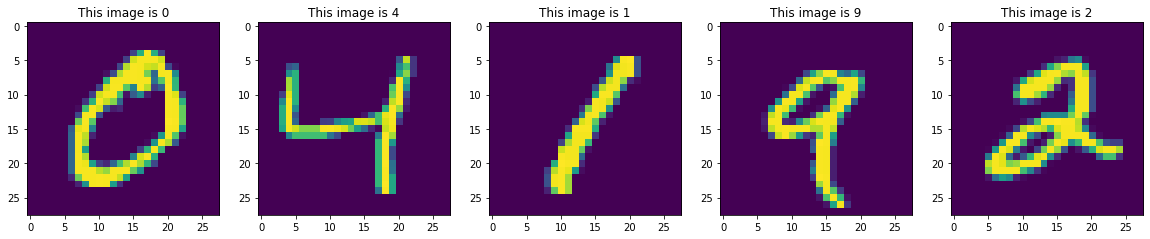

In [5]:
%matplotlib inline
plt.figure(figsize=(20,20))
for i in range(1, 6):
    plt.subplot(1, 5, i)
    im = Image.fromarray(x[i])
    plt.imshow(im)
    plt.title(f'This image is {y[i]}')
plt.show()

In [0]:
def preprocess(x, y):
    x = tf.expand_dims(tf.cast(x, dtype=tf.float32) / 255., 3)
    y = tf.cast(to_categorical(tf.cast(y, dtype=tf.int32), num_classes=10), dtype=tf.int32)
    print(x.shape)
    return x,y

In [0]:
class LeNet5(keras.Model):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.LeNet5 = Sequential([
            layers.Conv2D(6, kernel_size=[5,5], padding="valid", activation=tf.nn.relu),
            layers.MaxPool2D(pool_size=[2,2], strides=2, padding="same"),
            layers.Conv2D(16, kernel_size=[5,5], padding="valid", activation=tf.nn.relu),
            layers.MaxPool2D(pool_size=[2,2], strides=2, padding="same"),
            layers.Flatten(),
            layers.Dense(120, activation=tf.nn.relu),
            layers.Dropout(rate=0.5),
            layers.Dense(84, activation=tf.nn.relu),
            layers.Dropout(rate=0.5),
            layers.Dense(10, activation=tf.nn.softmax)
        ])
        
    def call(self, inputs, training=None):
        x = inputs
        prediction = self.LeNet5(x)
        return prediction

In [0]:
def main(x, y, x_test, y_test):
    epochs = 1000
    model = LeNet5()
    model.build(input_shape=(None, 28, 28, 1))
    model.summary()
    save_best = keras.callbacks.ModelCheckpoint('/drive/My Drive/Github/CNN/LeNet5_best_model.h5',\
                                               monitor='val_loss', verbose=1, save_best_only=True,\
                                               mode='min')
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, min_delta=0, \
                                              patience=100, mode='auto')
    callbacks_list = [early_stop, save_best]
    model.compile(optimizer=optimizers.Adam(),
                 loss=losses.categorical_crossentropy,
                 metrics=['accuracy'])
    x, y = preprocess(x, y)
    x_test, y_test = preprocess(x_test, y_test)
    history = model.fit(x=x, y=y, epochs=epochs, batch_size=512, validation_data=(x_test, y_test),
                       verbose=1, callbacks=callbacks_list)
    return history

In [9]:
history = main(x, y, x_test, y_test)

Model: "le_net5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      multiple                  44426     
Total params: 44,426
Trainable params: 44,426
Non-trainable params: 0
_________________________________________________________________
(60000, 28, 28, 1)
(10000, 28, 28, 1)
Train on 60000 samples, validate on 10000 samples
Epoch 1/1000
59392/60000 [============================>.] - ETA: 0s - loss: 1.2035 - accuracy: 0.5941
Epoch 00001: val_loss improved from inf to 0.26652, saving model to /drive/My Drive/Github/CNN/LeNet5_best_model.h5
60000/60000 [==============================] - 8s 129us/sample - loss: 1.1969 - accuracy: 0.5965 - val_loss: 0.2665 - val_accuracy: 0.9246
Epoch 2/1000
54784/60000 [==========================>...] - ETA: 0s - loss: 0.4237 - accuracy: 0.8747
Epoch 00002: val_loss improved from 0.26652 to 0.14842, saving model to /drive/My Drive/Github/CNN/LeN

KeyboardInterrupt: ignored